# Evaluate Exercises

Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols


from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math

# 1. 

Load the tips dataset from either pydataset or seaborn.

In [2]:
from pydataset import data

tips = data('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


# 2.

Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

Here is some sample code to get you started:

In [3]:
'''
from sklearn.linear_model import LinearRegression

# assuming X and y are already defined
model = LinearRegression().fit(X, y)
predictions = model.predict(X)
'''

'\nfrom sklearn.linear_model import LinearRegression\n\n# assuming X and y are already defined\nmodel = LinearRegression().fit(X, y)\npredictions = model.predict(X)\n'

Modify and add to the code above as necessary for it to work with the tips dataset.

In [4]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to trainig data
lm.fit(tips[['total_bill']], tips.tip)

# make prediction
tips['yhat'] = lm.predict(tips[['total_bill']])

In [5]:
# make a baseline prediction (mean of the tip)
tips['baseline'] = tips.tip.median()

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.9
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.9
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.9
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.9
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.9


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

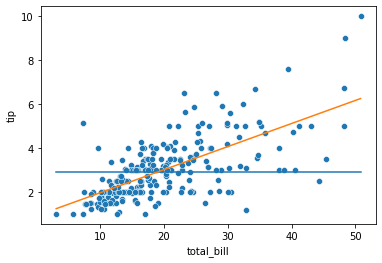

In [7]:
# plot data and prediction line

sns.scatterplot(x = 'total_bill', y = 'tip', data = tips)
sns.lineplot(x = 'total_bill', y = 'baseline', data = tips)
sns.lineplot(x = 'total_bill', y = 'yhat', data = tips)

# 3. 

Plot the residuals for the linear regression model that you made.

In [8]:
tips['residual'] = tips.tip - tips.yhat
tips['baseline_residual'] = tips.tip - tips.baseline

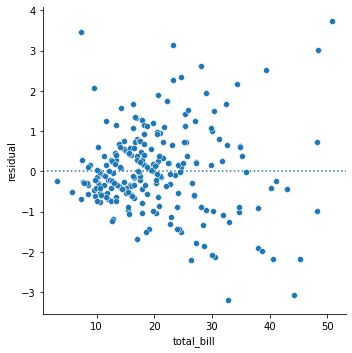

In [9]:
sns.relplot(x = 'total_bill', y = 'residual', data = tips)
plt.axhline(0, ls = ':')

# 4. 

Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [10]:
#Sum of Squared Errors
SSE = (tips.residual**2).sum()
print(f' The SSE of the OLS model is {round(SSE,1)}')

 The SSE of the OLS model is 252.8


In [11]:
#Mean squared error OLS:
MSE = SSE/len(tips)
MSE

1.036019442011377

In [12]:
# RMSE of OLS model
RMSE = mean_squared_error(tips.tip, tips.yhat, squared = False)
RMSE

1.0178504025697377

In [13]:
# ESS = sum(tips.yhat - tips.tip.mean())**2
ESS = sum((tips.yhat - tips.baseline)**2)
ESS

214.78045614922385

In [14]:
# Total Sum of Errors
TSS = ESS + SSE
TSS

467.56919999999985

# 5. 

Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [15]:
SSE_baseline = (tips.baseline_residual**2).sum()
print(f' The SSE of the baseline model is {round(SSE_baseline,1)}')

 The SSE of the baseline model is 467.6


In [16]:
#Mean squared error of baseline model:
MSE_baseline = SSE_baseline/len(tips)
MSE_baseline

1.916267213114754

In [17]:
# RMSE for the baseline model
RMSE_baseline = mean_squared_error(tips.tip, tips.baseline, squared = False)
RMSE_baseline

1.3842930372990951

# 6. 

Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [18]:
df_eval = pd.DataFrame(np.array(['SSE', 'MSE','RMSE']), columns=['metric'])
df_eval['model_error'] = np.array([SSE,  MSE, RMSE])


df_eval

,metric,model_error
0,SSE,252.788744
1,MSE,1.036019
2,RMSE,1.017850


In [19]:
df_eval['baseline_error'] = np.array([SSE_baseline,MSE_baseline, RMSE_baseline])

df_eval

,metric,model_error,baseline_error
0,SSE,252.788744,467.569200
1,MSE,1.036019,1.916267
2,RMSE,1.017850,1.384293


In [20]:
df_eval['better_than_baseline'] = df_eval.baseline_error > df_eval.model_error

In [21]:
df_eval

,metric,model_error,baseline_error,better_than_baseline
0,SSE,252.788744,467.569200,True
1,MSE,1.036019,1.916267,True
2,RMSE,1.017850,1.384293,True


# 7. 

What is the amount of variance explained in your model?

In [22]:
from sklearn.metrics import r2_score
r2_score(tips.tip, tips.yhat)

0.45661658635167657

# 8.

Is your model better than the baseline model?

In [23]:
def residuals(actual, predicted):
    return actual - predicted

def sse(actual, predicted):
    return (residuals(actual, predicted) **2).sum()

def mse(actual, predicted):
    n = actual.shape[0]
    return sse(actual, predicted) / n

def rmse(actual, predicted):
    return math.sqrt(mse(actual, predicted))

def ess(actual, predicted):
    return ((predicted - actual.mean()) ** 2).sum()

def tss(actual):
    return ((actual - actual.mean()) ** 2).sum()

def r2_score(actual, predicted):
    return ess(actual, predicted) / tss(actual)

In [24]:
def regression_errors(actual, predicted):
    return pd.Series({
        'sse': sse(actual, predicted),
        'ess': ess(actual, predicted),
        'tss': tss(actual),
        'mse': mse(actual, predicted),
        'rmse': rmse(actual, predicted),
    })

def baseline_mean_errors(actual):
    predicted = actual.mean()
    return {
        'sse': sse(actual, predicted),
        'mse': mse(actual, predicted),
        'rmse': rmse(actual, predicted),
    }

def better_than_baseline(actual, predicted):
    rmse_baseline = rmse(actual, actual.mean())
    rmse_model = rmse(actual, predicted)
    return rmse_model < rmse_baseline

In [25]:
better_than_baseline(tips.tip, tips.yhat)

True

# 9.

Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
 - sum of squared errors (SSE)
 - explained sum of squares (ESS)
 - total sum of squares (TSS)
 - mean squared error (MSE)
 - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [26]:
# done

# 9.

Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [27]:
mpg = data('mpg')

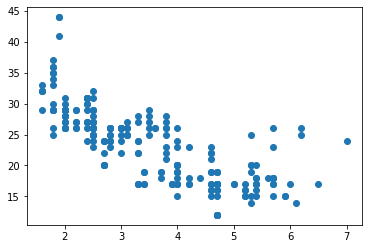

In [28]:
#plot displacement vs highway mpg

plt.scatter(mpg.displ, mpg.hwy)

In [29]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to trainig data
lm.fit(mpg[['displ']], mpg.hwy)

# make prediction
predictions = lm.predict(mpg[['displ']])

Text(0, 0.5, 'highway mpg')

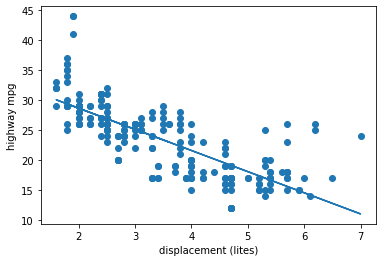

In [30]:
# plot regression line

plt.scatter(mpg.displ, mpg.hwy)
plt.plot(mpg.displ, predictions)
plt.xlabel('displacement (lites)')
plt.ylabel('highway mpg')

Text(0.5, 0, 'displacement (liters)')

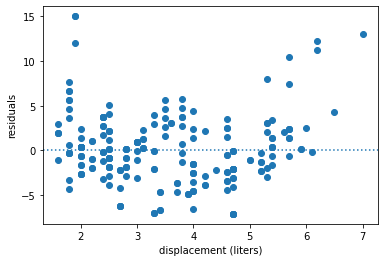

In [31]:
# plot displacement vs residuals

plt.scatter(mpg.displ, (mpg.hwy - predictions))
plt.axhline(0, ls = ':')
plt.ylabel('residuals')
plt.xlabel('displacement (liters)')

In [32]:
mpg[mpg.displ > 5]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
21,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
22,chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),r,13,17,r,suv
23,chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv
24,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater
25,chevrolet,corvette,5.7,1999,8,auto(l4),r,15,23,p,2seater
26,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater
27,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater
28,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater


In [33]:
# calculate regressions errors
evaluate.regression_errors(mpg.hwy, predictions)

NameError: name 'evaluate' is not defined

In [ ]:
# is our model better than baseline?

evaluate.better_than_baseline(mpg.hwy, predictions)

In [ ]:
# R2 score

evaluate.r2_score(mpg.hwy, predictions)